In [1]:
from sklearn.svm import SVC
from sentence_transformers import SentenceTransformer
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
%run -i "../util/util_simple_classifier.ipynb"

In [3]:
# Same as 4.4
train_df = pd.read_json("../data/bbc_train.json")
test_df = pd.read_json("../data/bbc_test.json")
train_df.sample(frac=1)

,text,label,label_text,text_tokenized,text_clean
2164,dollar hovers around record lows the us dollar...,1,business,"[dollar, hovers, around, record, lows, us, dol...",dollar hovers around record lows us dollar hov...
1951,john peel replacement show begins the permanen...,3,entertainment,"[john, peel, replacement, show, begins, perman...",john peel replacement show begins permanent re...
1841,blog reading explodes in america americans are...,0,tech,"[blog, reading, explodes, america, americans, ...",blog reading explodes america americans becomi...
827,itunes now selling band aid song ipod owners c...,3,entertainment,"[itunes, selling, band, aid, song, ipod, owner...",itunes selling band aid song ipod owners downl...
1552,fosters buys stake in winemaker australian bre...,1,business,"[fosters, buys, stake, winemaker, australian, ...",fosters buys stake winemaker australian brewer...
...,...,...,...,...,...
166,rings of steel combat net attacks gambling is ...,0,tech,"[rings, steel, combat, net, attacks, gambling,...",rings steel combat net attacks gambling hugely...
1447,goodrem wins top female mtv prize pop singer d...,3,entertainment,"[goodrem, wins, top, female, mtv, prize, pop, ...",goodrem wins top female mtv prize pop singer d...
1326,snow patrol bassist exits group snow patrol ha...,3,entertainment,"[snow, patrol, bassist, exits, group, snow, pa...",snow patrol bassist exits group snow patrol co...
673,long life promised for laptop pcs scientists a...,0,tech,"[long, life, promised, laptop, pcs, scientists...",long life promised laptop pcs scientists worki...


In [4]:
model = SentenceTransformer('all-MiniLM-L6-v2')
def get_sentence_vector(text, model):
    sentence_embeddings = model.encode([text])
    return sentence_embeddings[0]

c:\Users\ravik\anaconda3\envs\nlp_cookbook\lib\site-packages\huggingface_hub\file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
W0127 16:26:33.864000 10132 site-packages\torch\distributed\elastic\multiprocessing\redirects.py:29] NOTE: Redirects are currently not supported in Windows or MacOs.


In [5]:
def train_classifier(X_train, y_train):
    clf = SVC(C=0.1, kernel='rbf')
    clf = clf.fit(X_train, y_train)
    return clf

In [6]:
target_names=["tech", "business", "sport", "entertainment", "politics"]
vectorize = lambda x: get_sentence_vector(x, model)
(X_train, X_test, y_train, y_test) = create_train_test_data(train_df, test_df, vectorize, column_name="text_clean")
clf = train_classifier(X_train, y_train)
print(classification_report(train_df["label"], y_train, target_names=target_names))
test_classifier(test_df, clf, target_names=target_names)

               precision    recall  f1-score   support

         tech       1.00      1.00      1.00       321
     business       1.00      1.00      1.00       408
        sport       1.00      1.00      1.00       409
entertainment       1.00      1.00      1.00       309
     politics       1.00      1.00      1.00       333

     accuracy                           1.00      1780
    macro avg       1.00      1.00      1.00      1780
 weighted avg       1.00      1.00      1.00      1780

               precision    recall  f1-score   support

         tech       0.97      0.95      0.96        80
     business       0.98      0.97      0.98       102
        sport       0.98      1.00      0.99       102
entertainment       0.96      0.99      0.97        77
     politics       0.98      0.96      0.97        84

     accuracy                           0.98       445
    macro avg       0.97      0.97      0.97       445
 weighted avg       0.98      0.98      0.98       445



In [7]:
num_to_text_mapping = {0:"tech", 1:"business", 2:"sport", 3:"entertainment", 4:"politics"}
test_df["pred_label"] = test_df["prediction"].apply(lambda x: num_to_text_mapping[x])

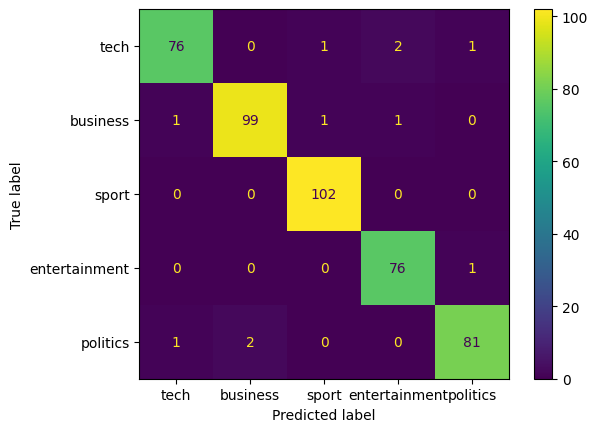

In [8]:
cm = confusion_matrix(test_df["label_text"], test_df["pred_label"], labels=target_names)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.show()